### Assignment 2: Python for Analytics

* covers lectures 4-6
* due: November 8th by 6pm.
* Points will be deducted if:
    * Problems are not completed.
    * Portions of problems are not completed.
    * Third party modules where used when the question specified not to do so.
    * The problem was solved in a very inefficient manner.  For instance, copying and pasting the same block of code 10 times instead of using a for loop or using a for loop when a comprehension would work.
    * <span style="color: red;">Each day late will result in a 10% penalty.</span>
    * <span style="color: red;">Not attemping a problem or leaving it blank will result in 0 points for the problem and an additional 5 point deduction.</span>

### Question 1 (15 points)

Using the Iris data, sum the 4 numeric  features and find out how many rows have a sum greater than 10.  Do this in two ways.  

* Using Numpy
* Using Pandas.

**Print the shape for both the Pandas and Numpy solution.**

In [1]:
import sys

In [2]:
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris

In [5]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.21.5
1.3.5
1.0.2


In [6]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df = iris_df.drop('target', 1)

C:\Users\Primo\AppData\Local\Temp\ipykernel_32412\1970229344.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  iris_df = iris_df.drop('target', 1)


In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Use numpy**

In [8]:
cols = iris_df.columns
cols

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [9]:
np_sepal_length = iris_df['sepal length (cm)'].values
np_sepal_width = iris_df['sepal width (cm)'].values
np_petal_length = iris_df['petal length (cm)'].values
np_petal_width = iris_df['petal width (cm)'].values
sumOfStats = np_sepal_length + np_sepal_width + np_petal_length + np_petal_width
np_greater_than_10 = sumOfStats[sumOfStats > 10]
print(np_greater_than_10)
print("The shape is: ", np_greater_than_10.shape)

[10.2 10.2 11.4 10.1 10.8 11.2 12.  11.  10.3 11.5 10.7 10.7 10.7 10.6
 10.3 10.4 10.4 10.2 10.7 10.9 11.3 10.5 10.2 10.1 10.7 11.2 10.7 10.7
 16.3 15.6 16.4 13.1 15.4 14.3 15.9 11.6 15.4 13.2 11.5 14.6 13.2 15.1
 13.4 15.6 14.6 13.6 14.4 13.1 15.7 14.2 15.2 14.8 14.9 15.4 15.8 16.4
 14.9 12.8 12.8 12.6 13.6 15.4 14.4 15.5 16.  14.3 14.  13.3 13.7 15.1
 13.6 11.6 13.8 14.1 14.1 14.7 11.7 13.9 18.1 15.5 18.1 16.6 17.5 19.3
 13.6 18.3 16.8 19.4 16.8 16.3 17.4 15.2 16.1 17.2 16.8 20.4 19.5 14.7
 18.1 15.3 19.2 15.7 17.8 18.2 15.6 15.8 16.9 17.6 18.2 20.1 17.  15.7
 15.7 19.1 17.7 16.8 15.6 17.5 17.8 17.4 15.5 18.2 18.2 17.2 15.7 16.7
 17.3 15.8]
The shape is:  (128,)


**Use Pandas**

In [10]:
iris_df['sum of the stats'] = iris_df[cols[0:4]].sum(axis=1)
pd_greater_than_10 = iris_df.loc[iris_df['sum of the stats'] > 10]
print("The shape is: ", pd_greater_than_10.shape)

The shape is:  (128, 6)


### Question 2 (10 points)

Consider the below two arrays.  The first will be actual values (`y`) and the second predicted values (`yhat`).  Calculate the below:

* MAE: Mean Absolute Error
    * defined as the average absolute error.
* MSE: Mean Squared Error
    * defined as taking the difference between the two arrays, squaring the errors, summing and finding the mean.
* MAPE: Mean Absolute Percentage Error
    * defined as the mean percentage difference between the two arrays.

Solve each using one line of code, making use of `numpy` array elementwise operations.

**Print out each metric.**

In [11]:
y = np.array([1,4,5,2,4,6,1])
yhat = np.array([5,2,3,4,5,6,1])

**MAE**

In [12]:
y_mae = np.mean(np.abs(y - yhat))
y_mae

1.5714285714285714

**MSE**

In [13]:
y_mse = np.square(y - yhat).mean()
y_mse

4.142857142857143

**MAPE**

In [14]:
y_mape = np.mean(np.abs((y - yhat) / y)) * 100
y_mape

87.85714285714286

### Question 3 (10 points)

Find the standard deviation and mean of `sepal_length` using `describe()` and `loc`.

Use the above mean and standard deviation to create two variables:

* `upper_bound`, defined as `mean + 2 standard deviations`
* `lower_bound`, defined as `mean - 2 standard deviations`

Subset the dataframe for only rows where `sepal_length` is either greater than the `upper_bound` `or` less than the `lower_bound`.

**Print the first 5 rows and shape of the subsetted dataframe.**

In [16]:
sepal_length_df = iris_df['sepal length (cm)']
sepal_length_mean = sepal_length_df.describe().loc['mean']
sepal_length_std = sepal_length_df.describe().loc['std']
upper = sepal_length_mean + 2 * sepal_length_std
lower = sepal_length_mean - 2 * sepal_length_std
subset_df = iris_df[iris_df['sepal length (cm)'].apply(lambda x: x > upper or x < lower)]
subset_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,sum of the stats
105,7.6,3.0,6.6,2.1,virginica,19.3
117,7.7,3.8,6.7,2.2,virginica,20.4
118,7.7,2.6,6.9,2.3,virginica,19.5
122,7.7,2.8,6.7,2.0,virginica,19.2
131,7.9,3.8,6.4,2.0,virginica,20.1


### Question 4 (15 points)

Load Boston Housing dataset from `sklearn` and put the data into a `pandas` `DataFrame` using the `data` and `feature_names` attributes from the `boston_data` object.  

Find the IQR (interquartile range) for `AGE`, which is defined as the 75th quartile - the 25th quartile.  

Remove observations with an `AGE` that are not within 1.5 IQR of the median.  This means you will have to subset the data for `less than median + 1.5 IQR` and `greater than median - 1.5 IQR`.  

Using the subsetted dataframe, find the strongest correlated feature with `AGE`, not including itself, and plot the two features as a scatter plot.  Note strongest correlated could mean positive or negative.

Hint, this can be solved using the `corr()` method, finding the absolve value of the `corr` metric, and sorting.

**Print the IQR, the highest correlating feature, the correlation itself and the scatter plot.**

In [61]:
from sklearn.datasets import load_boston

In [62]:
boston_data = load_boston()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [169]:
df = pd.DataFrame(boston_data['data'],columns=boston_data['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [173]:
df_desc = df['AGE'].describe()
print("The 25% quantile is: ", df_desc.loc['25%'])
print("The 50% quantile is: ", df_desc.loc['50%'])
print("The 75% quantile is: ", df_desc.loc['75%'])
IQR = df_desc.loc['75%'] - df_desc.loc['25%']
print("IQR is: ", IQR)

The 25% quantile is:  45.025
The 50% quantile is:  77.5
The 75% quantile is:  94.07499999999999
IQR is:  49.04999999999999


In [176]:
median_upper = df_desc.loc['50%'] + 1.5 * IQR
median_lower = df_desc.loc['50%'] - 1.5 * IQR

df = df[df['AGE'].apply(lambda x:x > median_lower and x < median_upper)]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [180]:
df_corr = abs(df.corr())
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,0.200941,0.406307,0.056124,0.420654,0.218830,0.352826,0.379311,0.625353,0.582648,0.289805,0.384911,0.455357
ZN,0.200941,1.000000,0.534751,0.042973,0.518052,0.312880,0.575041,0.666002,0.312924,0.315982,0.392045,0.175883,0.414643
INDUS,0.406307,0.534751,1.000000,0.062633,0.763456,0.391164,0.645664,0.707763,0.594768,0.720533,0.383103,0.356761,0.603406
CHAS,0.056124,0.042973,0.062633,1.000000,0.090788,0.091675,0.085728,0.098771,0.007780,0.036190,0.121671,0.048967,0.054589
NOX,0.420654,0.518052,0.763456,0.090788,1.000000,0.301322,0.731783,0.768844,0.610923,0.667401,0.188635,0.379833,0.590077
RM,0.218830,0.312880,0.391164,0.091675,0.301322,1.000000,0.238471,0.204259,0.209032,0.291073,0.355341,0.127710,0.613328
AGE,0.352826,0.575041,0.645664,0.085728,0.731783,0.238471,1.000000,0.748317,0.455260,0.504915,0.261762,0.273585,0.601240
DIS,0.379311,0.666002,0.707763,0.098771,0.768844,0.204259,0.748317,1.000000,0.493910,0.533560,0.232213,0.291211,0.496011
RAD,0.625353,0.312924,0.594768,0.007780,0.610923,0.209032,0.455260,0.493910,1.000000,0.910164,0.464649,0.444236,0.487897
TAX,0.582648,0.315982,0.720533,0.036190,0.667401,0.291073,0.504915,0.533560,0.910164,1.000000,0.460848,0.441676,0.542963


In [186]:
a = np.argsort(df_corr['AGE'].values)
index = df_corr.columns
highest_corr = index[a[-2]]
highest_corr

'DIS'

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


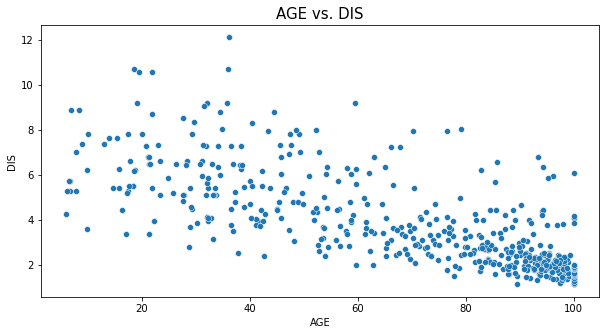

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
x = df['AGE'].values
y = df['DIS'].values
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x,y)
ax.set_xlabel("AGE", fontsize = 10)
ax.set_ylabel("DIS", fontsize = 10)
ax.set_title("AGE vs. DIS", fontsize = 15)
plt.show()

#### Question 5 (10 points)

`rating_df` is a rating matrix, where each row is a user, each column is a movie, and the cells are how a given user rated a given movie.  For instance, the upper left cell has a `4`, meaning `user_1` rated `star_wars` as a `4`.

Perform the below 3 transformations on `rating_df`.

* min_max: 0-1 scale
    * defined as (x - min(x))/(max(x) - min(x))
* mean_centered:
    * x - mean(x)
* z_score: 
    * (x - mean(x))/std(x)

This means, for instance, each column for min max should be scaled to where the max is 1 and the min is 0.

Hint, this should be done using 1 line, making use of broadcasting and rows and columnwise mean, min, max and standard deviation calculations.  

DO NOT USE ANY FUCTIONALITY IMPORTED FROM `sklearn`.

**Print out the 3 scaled dataframes.**

In [155]:
import numpy as np 
import pandas as pd 

user_1 = np.array([4,2,5])
user_2 = np.array([1,5,4])
user_3 = np.array([2,4,2])
user_4 = np.array([3,5,4])

rating_matrix = np.array([user_1, user_2, user_3, user_4])

columns = ["star_wars", "harry_potter", "avengers"]
index = ["user_1", "user_2", "user_3", "user_4"]

rating_df = pd.DataFrame(rating_matrix, columns = columns, index = index)

rating_df

,star_wars,harry_potter,avengers
user_1,4,2,5
user_2,1,5,4
user_3,2,4,2
user_4,3,5,4


In [161]:
rating_df_min_max = (rating_df[['star_wars', 'harry_potter', 'avengers']] - \
                     rating_df[['star_wars', 'harry_potter', 'avengers']].min()) / \
                    (rating_df[['star_wars', 'harry_potter', 'avengers']].max()- \
                     rating_df[['star_wars', 'harry_potter', 'avengers']].min())
rating_df_min_max

,star_wars,harry_potter,avengers
user_1,1.000000,0.000000,1.000000
user_2,0.000000,1.000000,0.666667
user_3,0.333333,0.666667,0.000000
user_4,0.666667,1.000000,0.666667


In [164]:
rating_df_mean_centered = rating_df[['star_wars', 'harry_potter', 'avengers']] - \
                          rating_df[['star_wars', 'harry_potter', 'avengers']].mean()
rating_df_mean_centered

,star_wars,harry_potter,avengers
user_1,1.5,-2.0,1.25
user_2,-1.5,1.0,0.25
user_3,-0.5,0.0,-1.75
user_4,0.5,1.0,0.25


In [166]:
rating_df_z_score = (rating_df[['star_wars', 'harry_potter', 'avengers']] - \
                    rating_df[['star_wars', 'harry_potter', 'avengers']].mean()) / \
                    rating_df[['star_wars', 'harry_potter', 'avengers']].std()
rating_df_z_score

,star_wars,harry_potter,avengers
user_1,1.161895,-1.414214,0.993399
user_2,-1.161895,0.707107,0.198680
user_3,-0.387298,0.000000,-1.390759
user_4,0.387298,0.707107,0.198680


### Quesiton 6 (15 points)

Find the pariwise distances of each users rating vector using the eudclidean distance.  For instance, `user_1` has a vector of `[4,2,5]` while `user_2` has a vector of `[1,5,4]`.  Finding the distance between these two vectors would give us the distance between `user_1` and `user_2`.

Add a column to `rating_df` called `most_similar_user` that has the `user_id` of the most similar user for that given observation.  

Note, when making a distance matrix, the min distance is going to be the distance between each user and themselves.  Make sure the most_similar_user is not the user themself.

Hint, this can be solved using `squareform` and `pdist` from `scipy`, then sorting the resulting distance matrix using `argsort` from `numpy`.  Remember, `argsort` sorts the values, then provides an index, so the index can then be converted to a user using the `columns` list of users.

**Print out the dataframe with the new column.**

In [148]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [149]:
user_1 = np.array([4,2,5])
user_2 = np.array([1,5,4])
user_3 = np.array([2,4,2])
user_4 = np.array([3,5,4])

rating_matrix = np.array([user_1, user_2, user_3, user_4])

columns = ["star_wars", "harry_potter", "avengers"]
index = ["user_1", "user_2", "user_3", "user_4"]

rating_df = pd.DataFrame(rating_matrix, columns = columns, index = index)

rating_df

,star_wars,harry_potter,avengers
user_1,4,2,5
user_2,1,5,4
user_3,2,4,2
user_4,3,5,4


In [150]:
dist_df = pd.DataFrame(squareform(pdist(rating_df)), index = index, columns = index)
dist_df

,user_1,user_2,user_3,user_4
user_1,0.000000,4.358899,4.123106,3.316625
user_2,4.358899,0.000000,2.449490,2.000000
user_3,4.123106,2.449490,0.000000,2.449490
user_4,3.316625,2.000000,2.449490,0.000000


In [154]:
lowest_dist = []
for row in index:
    a = np.argsort(dist_df[row].values)
    lowest_dist.append(index[a[1]])

rating_df['most similarity'] = lowest_dist
rating_df

,star_wars,harry_potter,avengers,most similarity
user_1,4,2,5,user_4
user_2,1,5,4,user_4
user_3,2,4,2,user_2
user_4,3,5,4,user_2


### Question 7 (10 points)

Use a for `loop` to make a 2,3 and 4 period rolling mean column for each user.  Making sure to add each column to the dataframe.

Hint, since this is finding the rolling mean for each user, we can use `groupby` and `rolling` in pandas.

**Print the dataframe out.**

In [129]:
import numpy as np
import pandas as pd

In [130]:
def my_func(x):
    if x == 1:
        return x

In [131]:
[my_func(i) for i in [1,2,3,4,5]]

[1, None, None, None, None]

In [132]:
metric = np.array([5,3,2,4,5,1,4,1,4,2,5,3,1,2,3])
ids = np.array(["a","a","a","a","a","b","b","b","b","b","c","c","c","c","c"])

df = pd.DataFrame({
    "id":ids,
    "metric":metric
})
df

,id,metric
0,a,5
1,a,3
2,a,2
3,a,4
4,a,5
5,b,1
6,b,4
7,b,1
8,b,4
9,b,2


In [134]:
rolling_metrics = [2,3,4]
for i in rolling_metrics:
    name = "rolling_metric_" + str(i)
    a = df.groupby(['id']).rolling(i).mean().reset_index()
    df[name] = a['metric']

df

,id,metric,rolling_metric_2,rolling_metric_3,rolling_metric_4
0,a,5,NaN,NaN,NaN
1,a,3,4.0,NaN,NaN
2,a,2,2.5,3.333333,NaN
3,a,4,3.0,3.000000,3.50
4,a,5,4.5,3.666667,3.50
5,b,1,NaN,NaN,NaN
6,b,4,2.5,NaN,NaN
7,b,1,2.5,2.000000,NaN
8,b,4,2.5,3.000000,2.50
9,b,2,3.0,2.333333,2.75


### Question 8 (15 points)

The below dataframe has the `sales` in each `month` for 3 `products`.  The first 5 rows of data can be interpreted as monthly sales for months `1-5` for product `a`.  So, the `sales` for product `a` are `[5,3,2,4,5]`.  

Pivot the below dataframe so the rows are the `month`, the columns are the `products` and the cell values are the `sales` for a given `month-product`.

Find pairwise correlations for each `products` sales.  The result should be a 3 x 3 correlation matrix.

Find the `products` with the highest correlating sales.  Create  a dataframe with two columns, the first being an a `product` and the second column the highest correlating product.

Hint, once the data is pivoted, you can use the `corr()` method, get the absolute value of the correlation and use `argsort` to sort the correlation dataframe.  Remember, highest correlation could be positive or negative.

**Print the 3 by 3 correlation matrix and the two column dataframe with the most similar ids.**

In [18]:
metric = np.array([5,3,2,4,5,1,4,1,4,2,5,3,1,2,3])
periods = [1,2,3,4,5] * 3
ids = np.array(["a","a","a","a","a","b","b","b","b","b","c","c","c","c","c"])

df = pd.DataFrame({
    "product": ids,
    "sales": metric,
    "month": periods
})

df

,product,sales,month
0,a,5,1
1,a,3,2
2,a,2,3
3,a,4,4
4,a,5,5
5,b,1,1
6,b,4,2
7,b,1,3
8,b,4,4
9,b,2,5


In [19]:
pivot_df = df.pivot(index = "month", columns = "product", values = "sales")
pivot_df

product,a,b,c
month,,,
1,5,1,5
2,3,4,3
3,2,1,1
4,4,4,2
5,5,2,3


In [20]:
df_corr = abs(pivot_df.corr())
df_corr

product,a,b,c
product,,,
a,1.000000,0.075858,0.749777
b,0.075858,1.000000,0.177822
c,0.749777,0.177822,1.000000


In [21]:
index = df_corr.index
highest_corr = []
for row in index:
    a = np.argsort(df_corr[row].values)
    highest_corr.append(index[a[-2]])

highest_corr_d = {'col1':index,'highest correlation product':highest_corr}
highest_corr_df = pd.DataFrame(highest_corr_d)
highest_corr_df

,col1,highest correlation product
0,a,c
1,b,c
2,c,a
